In [21]:
import tensorflow as tf

In [32]:
import matplotlib.pyplot as plt

In [22]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.1
2.4.0


In [23]:
tf.test.is_gpu_available()

False

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [25]:
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

In [26]:
print("X_train_full.shape: ", X_train_full.shape)
print("y_train_full.shape: ", y_train_full.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train_full.shape:  (60000, 28, 28)
y_train_full.shape:  (60000,)
X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


In [103]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [104]:
class_names=list(set(y_train_full))
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [105]:
classes=["T-short/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

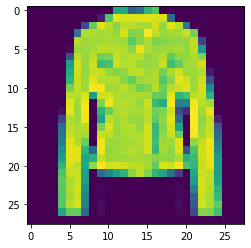

'Coat'

In [106]:
#classes = list(set(fashion_mnist.target))
i=9
plt.imshow(X_train[i])
plt.show()
classes[y_train[i]]

In [107]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(units=300, activation="relu"),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")    
])

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.layers

In [110]:
hidden1=model.layers[0]

In [111]:
for i, layer in enumerate(model.layers):
    print("{} {}".format(i, model.layers[i].name)) 

0 flatten_1
1 dense_3
2 dense_4
3 dense_5


In [112]:
hidden1 = model.layers[1]

In [114]:
#model.get_layer('dense') is hidden1


In [115]:
weights, biases = hidden1.weights 

In [116]:
weights

<tf.Variable 'dense_3/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[ 0.01892646,  0.01864656, -0.03602036, ...,  0.04582755,
        -0.01670528, -0.0722525 ],
       [-0.00420896, -0.0532738 , -0.01371464, ...,  0.00780462,
         0.06376866, -0.02828711],
       [-0.03010641,  0.02356788, -0.04034908, ..., -0.04123152,
        -0.02991709,  0.05629347],
       ...,
       [-0.00542358, -0.05504116, -0.05181821, ..., -0.02548859,
         0.06682433, -0.03399598],
       [-0.02956246,  0.05544956, -0.05401129, ...,  0.02394639,
        -0.02799995,  0.008151  ],
       [-0.04163796,  0.04194717, -0.05393902, ...,  0.03392109,
        -0.07177073,  0.05369541]], dtype=float32)>

In [117]:
biases

<tf.Variable 'dense_3/bias:0' shape=(300,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 

In [118]:
hidden2=model.layers[2]

In [119]:
weights2, biases2 = hidden2.weights

In [120]:
weights2

<tf.Variable 'dense_4/kernel:0' shape=(300, 100) dtype=float32, numpy=
array([[ 0.09584986, -0.04975961,  0.10267314, ..., -0.04760934,
        -0.03126795,  0.08305544],
       [-0.05525433, -0.01252107, -0.08863692, ...,  0.04186992,
         0.00491206, -0.07647793],
       [-0.01118198,  0.08815063,  0.02141408, ...,  0.00851154,
        -0.10467778,  0.07597715],
       ...,
       [ 0.03737132, -0.01648532, -0.06646863, ..., -0.10455751,
        -0.11460675, -0.00557595],
       [ 0.07339325, -0.06817474, -0.06667951, ..., -0.03841624,
        -0.04538452, -0.01058177],
       [-0.08945347, -0.06351784, -0.05206257, ..., -0.03880385,
         0.04876887, -0.04637501]], dtype=float32)>

In [121]:
biases2

<tf.Variable 'dense_4/bias:0' shape=(100,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [122]:
output=model.layers[3]

In [123]:
weights3, biases3= output.weights

In [124]:
weights3

<tf.Variable 'dense_5/kernel:0' shape=(100, 10) dtype=float32, numpy=
array([[-0.1866777 , -0.21613584, -0.19644332, -0.22912203,  0.20724285,
         0.10453287,  0.04141492,  0.04843611, -0.17263567,  0.0519402 ],
       [-0.09326899,  0.18160623, -0.04616955, -0.00618361,  0.09000638,
         0.19281062, -0.08850674,  0.03007501, -0.10025315,  0.04454663],
       [-0.03744236,  0.17726406, -0.22657722, -0.04384764, -0.21751855,
        -0.18477464,  0.19060093,  0.20250064, -0.08121239,  0.12472308],
       [ 0.10644823,  0.09758845, -0.1008646 ,  0.07671505,  0.05026585,
         0.18437457, -0.21767981, -0.19823056,  0.11360365,  0.03725737],
       [ 0.16482446, -0.07813503,  0.15454379,  0.11455917,  0.15375677,
        -0.12872717,  0.20200098, -0.03513271,  0.02515039, -0.18968433],
       [-0.15499303, -0.04941639,  0.1358997 ,  0.08119729,  0.10830709,
        -0.12045301, -0.18310967,  0.14871633,  0.2026282 ,  0.11984876],
       [-0.17168722, -0.19407418, -0.16614096, -

In [125]:
biases3

<tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [126]:
weights.shape

TensorShape([784, 300])

In [127]:
weights2.shape

TensorShape([300, 100])

In [128]:
weights3.shape

TensorShape([100, 10])

In [129]:
input = model.layers[0]

In [130]:
#input.name
#weights0, biases0 = input.weights 

In [131]:
model.compile(optimizer="sgd", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [133]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2239 - accuracy: 0.9189 - val_loss: 0.3080 - val_accuracy: 0.8908
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2204 - accuracy: 0.9207 - val_loss: 0.2937 - val_accuracy: 0.8962
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2169 - accuracy: 0.9218 - val_loss: 0.3502 - val_accuracy: 0.8676
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2136 - accuracy: 0.9234 - val_loss: 0.2967 - val_accuracy: 0.8942
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2097 - accuracy: 0.9246 - val_loss: 0.3486 - val_accuracy: 0.8716
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9251 - val_loss: 0.2900 - val_accuracy: 0.8968
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2034 - accuracy: 0.9277 - val_loss: 0.2881 - val_ac

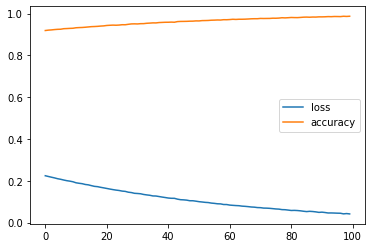

In [135]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()